C:\Users\M\AppData\Local\Temp\ipykernel_13872\3284871494.py:27: RuntimeWarning: divide by zero encountered in divide
  return const.h*const.c/E*1e9/const.elementary_charge


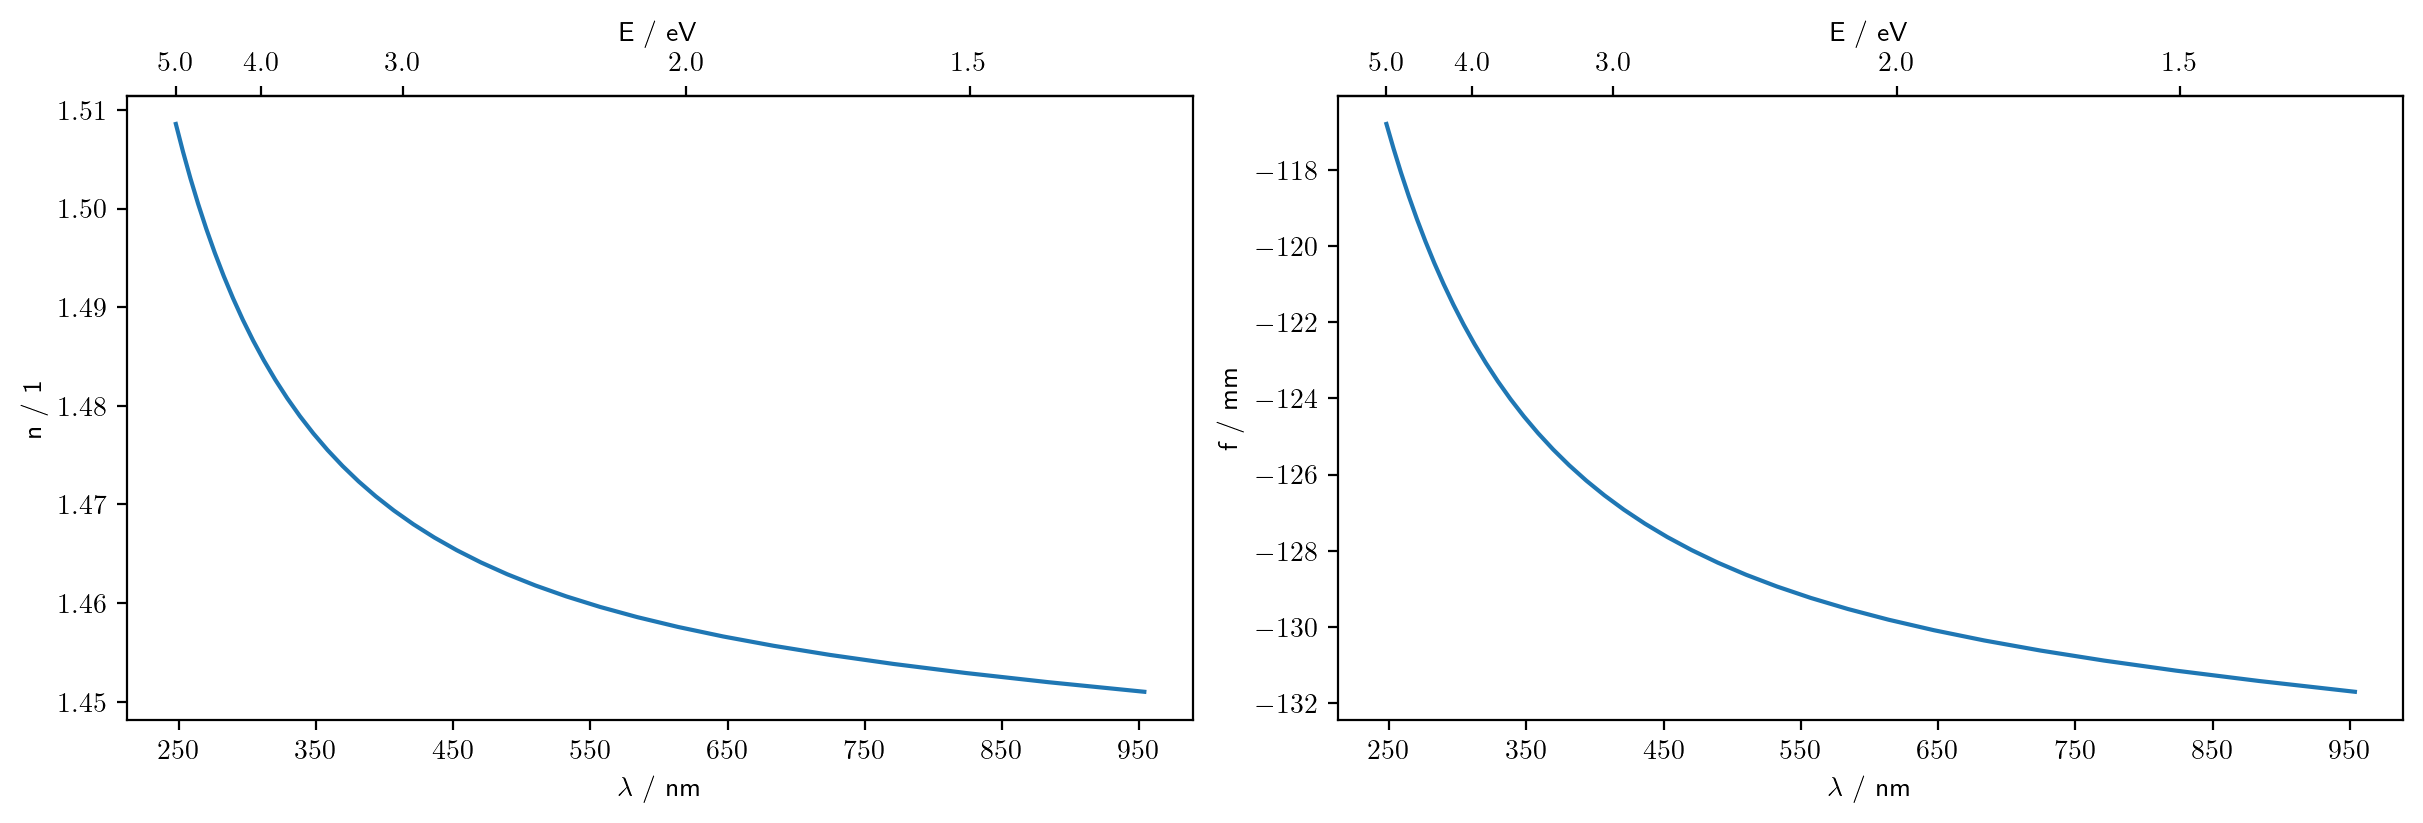

In [9]:
import numpy as np 
import matplotlib.pyplot as plt 
from scipy import constants as const
plt.rcParams['text.usetex'] = True

#Sellmeier equation
def n_squared(lamb, coeffs):
    '''lamb in µm'''
    n2 = 1
    lsquare = lamb**2
    for index in range(3):
        n2 = n2 + coeffs[index, 0]*lsquare/(lsquare-coeffs[index, 1]**2)
    return n2

#Lensmaker equation
def lensmaker(n, R1, R2, d=0):
    '''Returns 1/focal length'''
    f_inv = (n-1)*(1/R1 - 1/R2 + (n-1)*d/(n*R1*R2))
    return f_inv

def wavToEnergy(lamb):
    #Energy in eV, lamb in nm
    return const.h*const.c/lamb*1e9/const.elementary_charge

def energyToWav(E):
    #Energy in eV, lamb in nm
    return const.h*const.c/E*1e9/const.elementary_charge



#https://refractiveindex.info/?shelf=glass&book=fused_silica&page=Malitson
#Maltison 1965 UV fused silica: 0.21 µm - 3.71 µm
coeffsUVFS = np.array([[0.6961663, 0.0684043], [0.4079426, 0.1162414], [0.8974794, 9.896161]])

#Energy range is 1.3 eV to 5 eV in .1 eV steps
energies = np.linspace(1.3, 5, 37)*const.elementary_charge
wavs = const.h*const.c/energies


fig, axs = plt.subplots(1,2, layout='constrained', figsize = (12,4), dpi=200)
#µm for sellmeier
n_wav = np.sqrt(n_squared(wavs*1e6, coeffsUVFS))
axs[0].plot(wavs*1e9, n_wav)
axs[0].set_ylabel('n / 1')
axs[0].set_xlabel(r'$\lambda$ / nm')
axs[0].set_xticks(np.arange(250, 951, 100))
secax0 = axs[0].secondary_xaxis('top', functions=(wavToEnergy, energyToWav))
secax0.set_xticks([1.5, 2, 3, 4, 5])
secax0.set_xlabel("E / eV")

#second part with focal distance
focal_distance = lensmaker(n_wav, np.inf, 59.4)
focal_distance = 1/focal_distance
axs[1].plot(wavs*1e9, focal_distance)
axs[1].set_ylabel('f / mm')
axs[1].set_xlabel(r'$\lambda$ / nm')
axs[1].set_xticks(np.arange(250, 951, 100))

secax1 = axs[1].secondary_xaxis('top', functions=(wavToEnergy, energyToWav))
secax1.set_xticks([1.5, 2, 3, 4, 5])
secax1.set_xlabel("E / eV")

plt.show()


<Figure size 640x480 with 0 Axes>

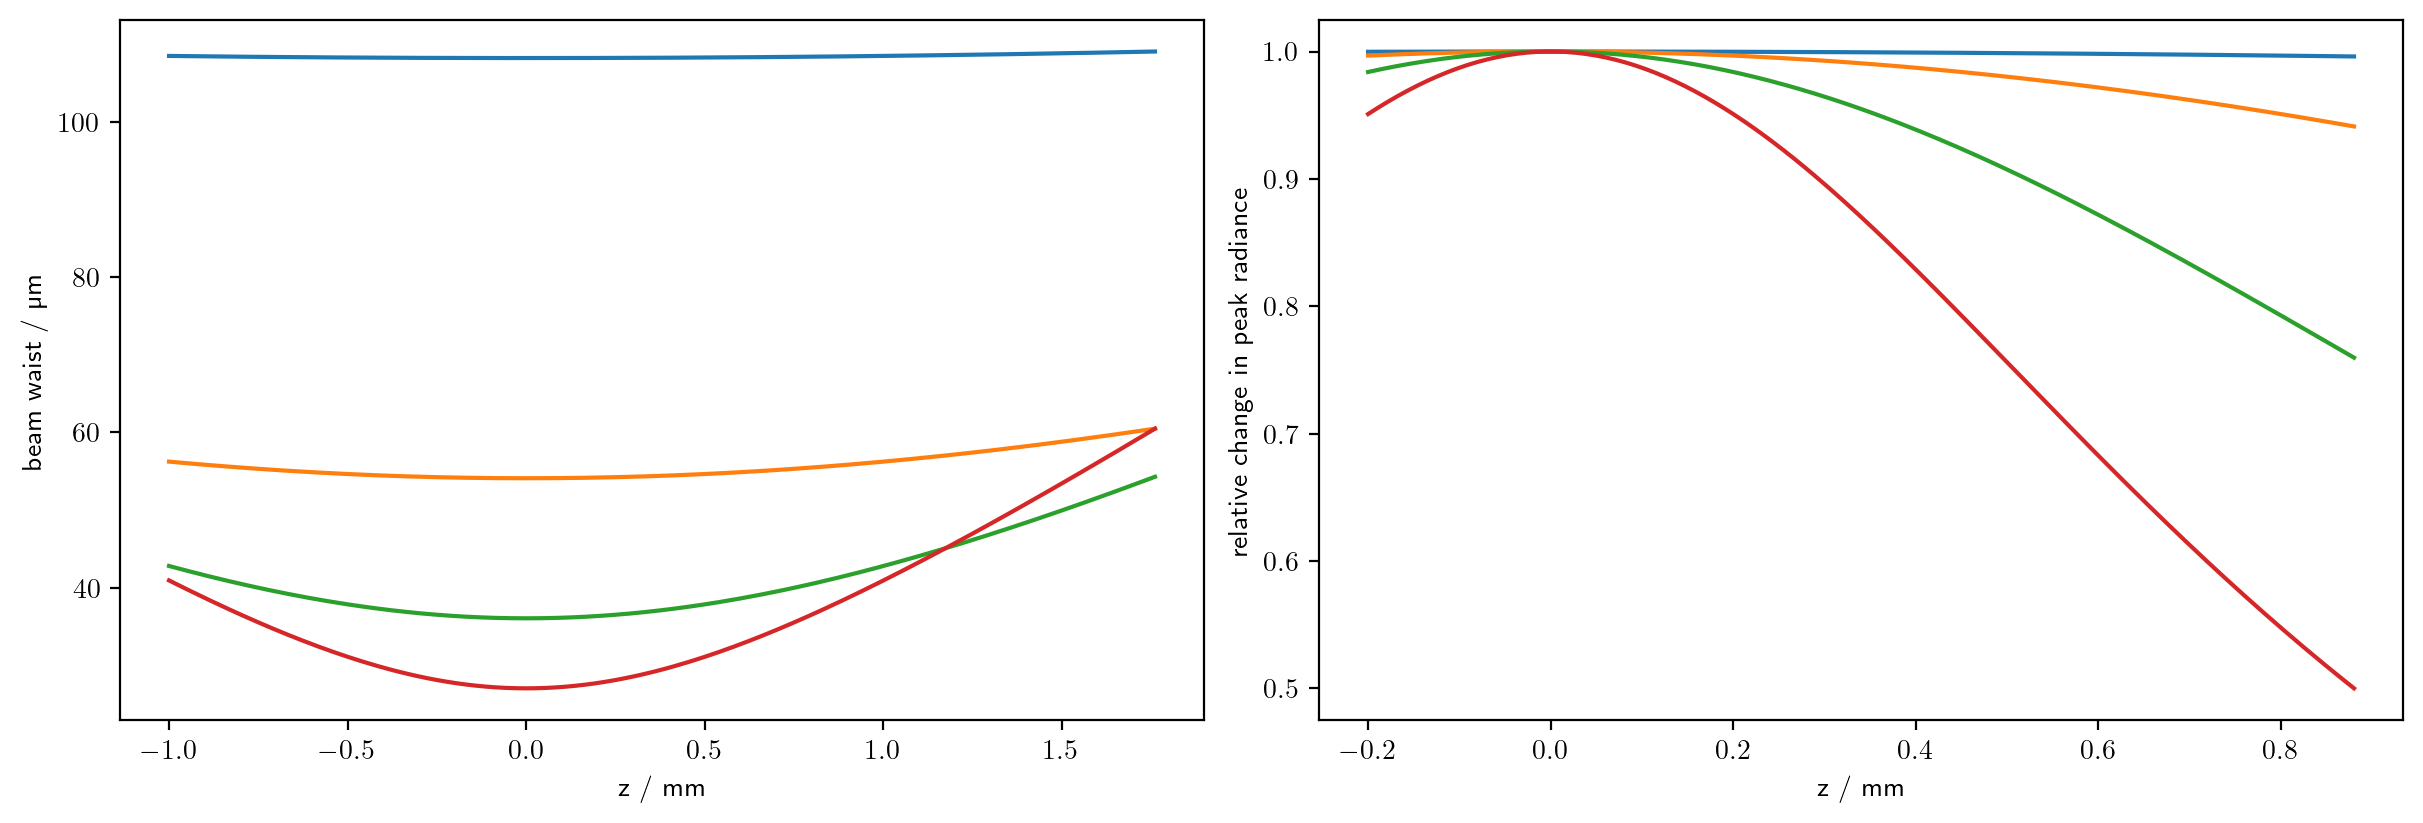

In [61]:
import numpy as np
import matplotlib.pyplot as plt

#taken from edmund optics: Laser Optics and Resource Guide Section 2: Gaussian Beam Propagation

w_c = lambda w0, lamb, z: w0*np.sqrt(1+(lamb*z/(np.pi*w0**2))**2)
w0_c = lambda lamb, theta: lamb/np.pi/theta
zr_c = lambda lamb, w0: np.pi*w0**2/lamb

#collimated beam through lens with focal distance f
#taken from angular aperture
theta_c = lambda D, f: np.arctan(D/(2*f))



wav = 653e-9 # nm
#https://refractiveindex.info/?shelf=glass&book=fused_silica&page=Malitson
#Maltison 1965 UV fused silica: 0.21 µm - 3.71 µm
coeffsUVFS = np.array([[0.6961663, 0.0684043], [0.4079426, 0.1162414], [0.8974794, 9.896161]])
n = np.sqrt(n_squared(wav*1e6,coeffsUVFS))
f = 1/lensmaker(n, 59.4, np.inf)*1e-3

diameters = np.array([1, 2, 3, 4])*1e-3 # mm
thet = theta_c(diameters, f)
w0 = w0_c(wav, thet)
#print(w0*2)

zr = zr_c(wav, w0[1])

z = np.linspace(-1e-3, zr/2, 200)

plt.figure()
#plt.tight_layout()
fig, axs = plt.subplots(1,2, layout='constrained', figsize = (12,4), dpi=200)
#fig.suptitle("653 nm beam waist")
for index in range(len(diameters)):
    axs[0].plot(z*1e3, w_c(w0[index], wav, z)*2e6, label="%.1f mm" %(diameters[index]*1e3))
axs[0].set_xlabel("z / mm")
axs[0].set_ylabel("beam waist / µm")
#axs[0].legend()

z = np.linspace(-2e-4, zr/4, 200)


for index in range(len(diameters)):
    axs[1].plot(z*1e3, 1/(w_c(w0[index], wav, z)/w0[index])**2, label="%.1f mm" %(diameters[index]*1e3))
axs[1].set_xlabel("z / mm")
axs[1].set_ylabel("I_rel / a.u.")

plt.show()

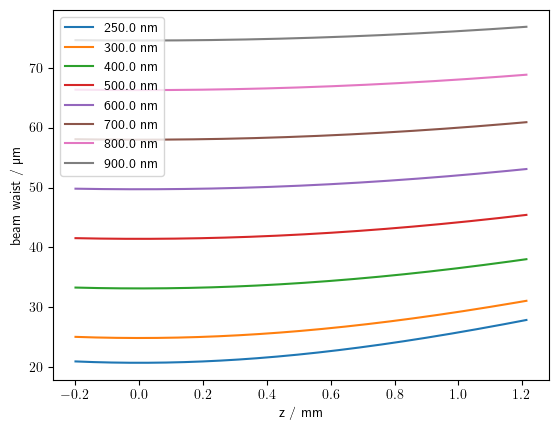

In [62]:
import numpy as np
import matplotlib.pyplot as plt

#taken from edmund optics: Laser Optics and Resource Guide Section 2: Gaussian Beam Propagation

w_c = lambda w0, lamb, z: w0*np.sqrt(1+(lamb*z/(np.pi*w0**2))**2)
w0_c = lambda lamb, theta: lamb/np.pi/theta
zr_c = lambda lamb, w0: np.pi*w0**2/lamb

#collimated beam through lens with focal distance f
#taken from angular aperture
theta_c = lambda D, f: np.arctan(D/(2*f))


dia = 2e-3 # m
wavs = np.array([250,300, 400, 500, 600, 700, 800, 900])*1e-9 #wavs in m
n = np.sqrt(n_squared(wav*1e6,coeffsUVFS))
f = 1/lensmaker(n, 59.4, np.inf)*1e-3
thet = theta_c(dia, f)
w0 = w0_c(wavs, thet)

zr = np.max(zr_c(wavs, w0))

z = np.linspace(-2e-4, zr/4, 200)

plt.figure()
#plt.title("Beam waist vs wavelength behavior at 2 mm collimated waist")
for index in range(len(wavs)):
    plt.plot(z*1e3, w_c(w0[index], wavs[index], z)*2e6, label="%.1f nm" %(wavs[index]*1e9))
plt.xlabel("z / mm")
plt.ylabel("beam waist / µm")
plt.legend()



plt.show()